### UNIVERSIDAD NACIONAL AUTÓNOMA DE MÉXICO

#### FACULTAD DE INGENIERÍA 
#### SEMESTRE 2025-2
#### ASIGNATURA: ROBOTICA
#### PROFESOR: ERIK PEÑA MEDINA
#### ALUMNO: GUTIERREZ MELGOZA VICENTE JONATHAN

#### PRIMER EXAMEN PARCIAL

In [2]:
## --------------------------------------------------------------------------------------------------------------------------------------------

### INTRODUCCIÓN

El estudio del comportamiento de un robot, requiere herramientas que permitan describir cómo se mueven, cómo se posicionan y cómo responden dinámicamente ante estímulos externos. Se tuvieron que desarrollar representaciones matemáticas que modelen tanto la cinemática como la dinámica del sistema. Este examen tiene como finalidad documentar la construcción e implementación de dichos modelos con el apoyo de la plataforma MATLAB.
A través del modelado cinemático es posible predecir la posición y orientación del efector final del robot a partir de los ángulos de sus articulaciones, así como determinar qué combinaciones de movimientos articulares permiten alcanzar una ubicación específica. De manera complementaria, el análisis de velocidades y aceleraciones articulares permite entender cómo se transmiten estos cambios al efector final, lo cual es clave para un control eficiente y preciso.
Por su parte, el modelado dinámico permite identificar las fuerzas y torques que deben aplicarse a las articulaciones para generar movimientos deseados, considerando aspectos como la masa, la energía cinética y potencial de cada eslabón. Este análisis resulta esencial para la planificación de trayectorias, el diseño de sistemas de control robusto y la optimización del rendimiento del robot en tareas complejas.
En las siguientes secciones se detallará el proceso de desarrollo de estos modelos, su formulación matemática y su implementación en MATLAB, con el fin de proporcionar una visión integral del comportamiento del robot desde el modelado en Scara del robot.


### MODELADO CINEMATICO DE LA POSTURA DE UN ROBOT.

Para modelar la relación de posición y orientación entre eslabones consecutivos de un robot manipulador, se definió una función simbólica que genera una matriz de transformación homogénea de dimensiones 4x4. Esta matriz es fundamental para representar tanto la rotación como la traslación de un sistema de coordenadas 𝑖 con respecto a otro sistema 𝑗. La función Tij se formuló utilizando las variables simbólicas x_ij, y_ij, z_ij, que corresponden a los componentes de traslación, junto con los ángulos de Euler y_j, B_j y a_j, que representan las rotaciones sucesivas del sistema 𝑖 hacia el sistema 𝑗, a través de los ejes Z, Y y X, respectivamente.

In [1]:
& Importar la librería SymPy, que nos permitirá trabajar con algébra simbólica
import sympy as sp

& Definir las variables simbólicas que se utilizarán en la matriz de transformación homogénea
& Estas variables representan los desplazamientos (x_i_j, y_i_j, z_i_j) y los ángulos de Euler (gi_j, bi_j, ai_j)
x_i_j, y_i_j, z_i_j, gi_j, bi_j, ai_j = sp.symbols('x_i_j y_i_j z_i_j gi_j bi_j ai_j')

& Definir la matriz de transformación homogénea Tij, que describe la relación entre dos sistemas de coordenadas
  La matriz es de 4x4, donde la primera parte de la matriz corresponde a las rotaciones, y la última columna representa las traslaciones

Tij = sp.Matrix([  # Creamos la matriz de transformación
    & Primera fila: describe la transformación en el eje X, utilizando los ángulos de Euler
    [sp.cos(ai_j)*sp.cos(bi_j),  # Coseno de la rotación en X y Y
     sp.cos(ai_j)*sp.sin(bi_j)*sp.sin(gi_j) - sp.sin(ai_j)*sp.cos(gi_j),  # Rotación en el eje Y (combinación de gi_j y bi_j)
     sp.sin(ai_j)*sp.sin(gi_j) + sp.cos(ai_j)*sp.sin(bi_j)*sp.cos(gi_j),  # Rotación en el eje Z
     x_i_j],  # Desplazamiento en X

    & Segunda fila: describe la transformación en el eje Y
    [sp.sin(ai_j)*sp.cos(bi_j),  # Rotación en el eje X
     sp.cos(ai_j)*sp.cos(gi_j) + sp.sin(ai_j)*sp.sin(bi_j)*sp.sin(gi_j),  # Rotación en el eje Y
     sp.sin(ai_j)*sp.sin(bi_j)*sp.cos(gi_j) - sp.cos(ai_j)*sp.sin(gi_j),  # Rotación en el eje Z
     y_i_j],  # Desplazamiento en Y

    & Tercera fila: describe la transformación en el eje Z
    [-sp.sin(bi_j),  # Rotación en el eje X
     sp.cos(bi_j)*sp.sin(gi_j),  # Rotación en el eje Y
     sp.cos(bi_j)*sp.cos(gi_j),  # Rotación en el eje Z
     z_i_j],  # Desplazamiento en Z

    & Cuarta fila: representa la fila de homogeneidad de la matriz 4x4
    [0, 0, 0, 1]  & Fila de homogeneidad que asegura que la matriz es una matriz de transformación homogénea 4x4
])

& Mostrar la matriz resultante para observar cómo se representa la transformación homogénea
Tij


Matrix([
[cos(ai_j)*cos(bi_j), -sin(ai_j)*cos(gi_j) + sin(bi_j)*sin(gi_j)*cos(ai_j), sin(ai_j)*sin(gi_j) + sin(bi_j)*cos(ai_j)*cos(gi_j), x_i_j],
[sin(ai_j)*cos(bi_j),  sin(ai_j)*sin(bi_j)*sin(gi_j) + cos(ai_j)*cos(gi_j), sin(ai_j)*sin(bi_j)*cos(gi_j) - sin(gi_j)*cos(ai_j), y_i_j],
[         -sin(bi_j),                                  sin(gi_j)*cos(bi_j),                                 cos(bi_j)*cos(gi_j), z_i_j],
[                  0,                                                    0,                                                   0,     1]])

### MODELADO CINEMATICO DE LAS VELOCIDADES.


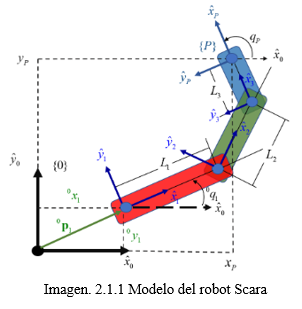

In [23]:
# Importar la librería SymPy, que nos permitirá trabajar con álgebra simbólica y matrices
import sympy as sp

# Definir las variables simbólicas que se utilizarán en la matriz
# x_O_1, y_O_1: Traslaciones en los ejes X y Y del sistema de coordenadas 1
# theta_O_1: Ángulo de rotación alrededor del eje Z
x_O_1, y_O_1, theta_O_1 = sp.symbols('x_O_1 y_O_1 theta_O_1')

# Definir la matriz de transformación Tij para un movimiento 2D en el plano XY
# Esta matriz representa una rotación en el plano XY alrededor del eje Z y una traslación en los ejes X y Y
# La matriz es de 4x4, con la primera parte que corresponde a la rotación y la última columna que representa las traslaciones.
def Tij(x, y, theta):
    return sp.Matrix([
        # Primera fila: describe la rotación en el plano XY y la traslación en el eje X
        [sp.cos(theta), -sp.sin(theta), 0, x],   # Coseno y seno de theta, representando la rotación en X y Y
        # Segunda fila: describe la rotación en el plano XY y la traslación en el eje Y
        [sp.sin(theta), sp.cos(theta), 0, y],    # Sin y coseno de theta, representando la rotación en Y
        # Tercera fila: representa una rotación en el plano XY (sin traslación en Z)
        [0, 0, 1, 0],                           # No hay cambio en el eje Z, por lo que la traslación es 0
        # Cuarta fila: fila de homogeneidad que asegura que la matriz es una matriz de transformación homogénea 4x4
        [0, 0, 0, 1]                            # Esta fila se mantiene constante para mantener la estructura homogénea
    ])

# Llamar a la función Tij con los parámetros previamente definidos
# Utilizamos las variables simbólicas x_O_1, y_O_1 y theta_O_1 para calcular la matriz de transformación
T_O_1 = Tij(x_O_1, y_O_1, theta_O_1)

# Mostrar la matriz resultante de la transformación
T_O_1




Matrix([
[cos(theta_O_1), -sin(theta_O_1), 0, x_O_1],
[sin(theta_O_1),  cos(theta_O_1), 0, y_O_1],
[             0,               0, 1,     0],
[             0,               0, 0,     1]])

In [28]:
# Importar la librería SymPy, que nos permitirá trabajar con álgebra simbólica y matrices
import sympy as sp

# Definir las variables simbólicas que se utilizarán en la matriz de transformación
# L_1: Longitud del eslabón entre los sistemas de coordenadas (traslación en el eje X)
# theta_1_2: Ángulo de rotación alrededor del eje Z entre los dos marcos de referencia
L_1, theta_1_2 = sp.symbols('L_1 theta_1_2')

# Definir la función Tij para calcular la matriz de transformación homogénea 4x4
# Esta función genera la matriz que describe la relación entre dos marcos de referencia, teniendo en cuenta la rotación sobre el eje Z y la traslación en el eje X
def Tij(x, y, theta):
    # La matriz 4x4 de transformación homogénea, que incluye:
    # - Rotación sobre el eje Z
    # - Traslación en el eje X (L_1)
    # - Sin traslación en el eje Y ni Z (en este caso)
    # - Fila de homogeneidad [0, 0, 0, 1] para asegurar la correcta forma de la matriz de transformación homogénea
    return sp.Matrix([
        # Primera fila: describe la rotación en Z y la traslación en X
        # Coseno y seno de theta para la rotación en el eje Z
        [sp.cos(theta), -sp.sin(theta), 0, x],  # Coseno y -seno de theta son los componentes de la rotación
        # Segunda fila: describe la rotación en Z y la traslación en Y
        # Sin y coseno de theta para la rotación en el eje Z
        [sp.sin(theta), sp.cos(theta), 0, y],   # Sin y coseno de theta para la rotación en el eje Y
        # Tercera fila: no hay traslación en Z
        [0, 0, 1, 0],                          # La rotación en Z no afecta a Z (por lo que es 1) y no hay traslación en Z
        # Cuarta fila: fila de homogeneidad para mantener la estructura de transformación homogénea 4x4
        [0, 0, 0, 1]                           # Esta fila asegura que la matriz es homogénea y válida para transformaciones 3D
    ])

# Calcular la matriz T_1_2 con las variables específicas
# Llamamos a la función Tij para calcular la matriz de transformación entre los marcos 1 y 2
# En este caso, la traslación en Y es 0 (no hay desplazamiento en Y), y la rotación es theta_1_2
T_1_2 = Tij(L_1, 0, theta_1_2)

# Mostrar la matriz resultante
# Al imprimir T_1_2, obtenemos la matriz de transformación homogénea que describe la relación entre los marcos 1 y 2
T_1_2


Matrix([
[cos(theta_1_2), -sin(theta_1_2), 0, L_1],
[sin(theta_1_2),  cos(theta_1_2), 0,   0],
[             0,               0, 1,   0],
[             0,               0, 0,   1]])

In [32]:
# Importar la librería SymPy, que nos permitirá trabajar con álgebra simbólica y matrices
import sympy as sp

# Definir las variables simbólicas necesarias para la matriz de transformación
# L_2: Longitud del eslabón entre los sistemas de coordenadas 2 y 3 (traslación en el eje X)
# theta_2_3: Ángulo de rotación alrededor del eje Z entre los sistemas de coordenadas 2 y 3
L_2, theta_2_3 = sp.symbols('L_2 theta_2_3')

# Definir la función Tij para calcular la matriz de transformación homogénea 4x4
# La función Tij genera una matriz de transformación homogénea que describe cómo un sistema de coordenadas
# se transforma en relación a otro, considerando tanto rotación como traslación.
def Tij(x, y, z, alpha, beta, gamma):
    # La matriz resultante es de 4x4 y tiene los siguientes componentes:
    return sp.Matrix([
        # Primera fila: describe la rotación en Z (coseno y seno de alpha) y la traslación en X (L_2)
        [sp.cos(alpha), -sp.sin(alpha), 0, x],  # Coseno y -seno de theta para la rotación en Z
        # Segunda fila: describe la rotación en Z (sin y coseno de alpha) y la traslación en Y (0 en este caso)
        [sp.sin(alpha), sp.cos(alpha), 0, y],   # Sin y coseno de theta para la rotación en Z
        # Tercera fila: describe la rotación en Z, sin traslación en Z (por lo que la traslación es 0)
        [0, 0, 1, z],                          # La traslación en Z es 0, solo hay rotación en Z
        # Cuarta fila: fila de homogeneidad para asegurar que la matriz es homogénea y válida para transformaciones 3D
        [0, 0, 0, 1]                           # Fila de homogeneidad, necesaria en una matriz de transformación homogénea
    ])

# Calcular la matriz T_2_3 con las variables específicas
# Llamamos a la función Tij para calcular la matriz de transformación entre los marcos 2 y 3.
# En este caso, la traslación en Y y Z es 0, la traslación en X es L_2, y la rotación es theta_2_3
T_2_3 = Tij(L_2, 0, 0, theta_2_3, 0, 0)

# Mostrar la matriz resultante
# Al imprimir T_2_3, obtenemos la matriz de transformación homogénea que describe cómo el sistema de coordenadas 3
# se posiciona y orienta en relación con el sistema de coordenadas 2, tomando en cuenta la traslación en X y la rotación en Z
T_2_3



Matrix([
[cos(theta_2_3), -sin(theta_2_3), 0, L_2],
[sin(theta_2_3),  cos(theta_2_3), 0,   0],
[             0,               0, 1,   0],
[             0,               0, 0,   1]])

In [34]:
# Definir la matriz Tij para la transformación homogénea
# En este caso, estamos generando una matriz de transformación homogénea que describe un desplazamiento lineal
# desde el tercer eslabón hasta el efector final, sin rotación adicional.
# L_3: Longitud del desplazamiento entre el tercer eslabón y el efector final (traslación en el eje X).
# No hay rotación en los ejes Y ni Z, por lo que esos valores son 0.
# La rotación en el eje X también es 0, ya que solo estamos considerando un desplazamiento lineal sin rotación.
T_3_P = Tij(L_3, 0, 0, 0, 0, 0)

# Mostrar la matriz resultante
# Al imprimir T_3_P, obtenemos la matriz de transformación homogénea entre el tercer eslabón y el efector final.
# Esta matriz refleja el desplazamiento en el eje X por una longitud de L_3 sin ninguna rotación involucrada.
T_3_P



Matrix([
[1, 0, 0, L_3],
[0, 1, 0,   0],
[0, 0, 1,   0],
[0, 0, 0,   1]])

### CÁLCULO DE LA TRANSFORMACIÓN 

La transformación completa desde el sistema base 𝑂 hasta el efector final 𝑃 se calcula mediante la multiplicación en secuencia de todas las matrices de transformación previas, lo que da como resultado la matriz T_0P.

In [35]:
# Importar SymPy para trabajar con álgebra simbólica y manipulación de matrices
import sympy as sp

# Asegúrate de que 'simplify' esté disponible para simplificar la matriz resultante
# La función 'simplify' se utiliza para simplificar la expresión matemática de la matriz resultante
# En este caso, estamos multiplicando las matrices T_O_1, T_1_2, T_2_3 y T_3_P en secuencia.
# Cada una de estas matrices representa una transformación entre los marcos de referencia.
# La multiplicación sucesiva de matrices de transformación nos da la matriz total T_O_P,
# que describe la transformación del sistema base O al efector final P.
T_O_P = sp.simplify(T_O_1 * T_1_2 * T_2_3 * T_3_P)

# Mostrar la matriz resultante
# Al imprimir T_O_P, obtenemos la matriz final que describe cómo el sistema de coordenadas
# del efector final P se encuentra en relación con el sistema base O, teniendo en cuenta
# todas las transformaciones intermedias entre los marcos de referencia.
T_O_P



Matrix([
[cos(theta_1_2 + theta_2_3 + theta_O_1), -sin(theta_1_2 + theta_2_3 + theta_O_1), 0, L_1*cos(theta_O_1) + L_2*cos(theta_1_2 + theta_O_1) + L_3*cos(theta_1_2 + theta_2_3 + theta_O_1) + x_O_1],
[sin(theta_1_2 + theta_2_3 + theta_O_1),  cos(theta_1_2 + theta_2_3 + theta_O_1), 0, L_1*sin(theta_O_1) + L_2*sin(theta_1_2 + theta_O_1) + L_3*sin(theta_1_2 + theta_2_3 + theta_O_1) + y_O_1],
[                                     0,                                       0, 1,                                                                                                        0],
[                                     0,                                       0, 0,                                                                                                        1]])

### VECTOR DE POSTURA 



In [36]:
# Definir el vector xi_O_P usando los elementos de la matriz T_O_P
# El vector xi_O_P contiene la información de la posición y orientación del efector final
# Extrayendo los valores relevantes de la matriz T_O_P:
# - T_O_P[0, 3]: El valor en la posición (0, 3) de la matriz T_O_P es la coordenada 'x' del efector final (traslación en X).
# - T_O_P[1, 3]: El valor en la posición (1, 3) de la matriz T_O_P es la coordenada 'y' del efector final (traslación en Y).
# - theta_O_1 + theta_1_2 + theta_2_3: La orientación del efector final es la suma de los tres ángulos articulares, que nos da el ángulo total
#   de rotación alrededor del eje Z.
xi_O_P = sp.Matrix([T_O_P[0, 3], T_O_P[1, 3], theta_O_1 + theta_1_2 + theta_2_3])

# Mostrar el vector xi_O_P
# El vector xi_O_P contiene la posición (x, y) y la orientación (la suma de los ángulos articulares) del efector final
# Este vector es una representación compacta de la postura del efector final en el sistema base.
xi_O_P



Matrix([
[L_1*cos(theta_O_1) + L_2*cos(theta_1_2 + theta_O_1) + L_3*cos(theta_1_2 + theta_2_3 + theta_O_1) + x_O_1],
[L_1*sin(theta_O_1) + L_2*sin(theta_1_2 + theta_O_1) + L_3*sin(theta_1_2 + theta_2_3 + theta_O_1) + y_O_1],
[                                                                       theta_1_2 + theta_2_3 + theta_O_1]])

- El primer término del vector describe la posición en el eje x, donde x_0,1 indica la coordenada horizontal del origen del primer eslabón, y el término Lcos(θ) representa la proyección en X del avance de cada eslabón a lo largo de su ángulo respectivo.
- El segundo término se refiere a la posición en el eje y, donde y_0,1 denota la coordenada vertical del origen del primer eslabón, y los términos que incluyen Lsen(θ) representan el desplazamiento en Y resultante del avance de los eslabones a medida que varía el ángulo compuesto.
- El tercer término del vector representa la orientación total del efector final, que es la suma de los tres ángulos articulares. Esta suma define la rotación acumulada del efector final en relación con la base.


 
1.	Determinar la distancia radial desde el origen hasta el punto objetivo deseado:


$r = \sqrt{x_d^2 + y_d^2}$

2. Determinar el segundo ángulo articular (θ_2) aplicando la ley de los cosenos:

$\theta_2 = \arccos{\left(\frac{r^2 - L_1^2 - L_2^2}{2 L_1 L_2}\right)}$


3. Determinar el primer ángulo articular (θ_1):

$\theta_1 = \arctan{\left(\frac{y_d}{x_d}\right)} - \arctan{\left(\frac{L_2 \sin(\theta_2)}{L_1 + L_2 \cos(\theta_2)}\right)}$


4. Por último, el tercer ángulo se calcula de la siguiente manera:

$\theta_3 = \theta_3 - \theta_2 - \theta_1$

### MODELADO CINEMATICO DE LAS VELOCIDADES.


Una vez obtenido el vector de postura ξ_0^P, pasamos a calcular la relación entre las velocidades articulares y la velocidad del efector final mediante el Jacobiano. Este mapea la velocidad angular de las articulaciones hacia la velocidad lineal y angular del efector.
La matriz Jacobiana se define como la derivada del vector de postura con respecto a los ángulos articulares, lo que da como resultado la matriz J(θ). Esta matriz establece la relación entre la velocidad de las articulaciones y la velocidad del efector final, de acuerdo con:


### JACOBIANO

La conexión entre las velocidades articulares y la velocidad del efector final se expresa mediante la ecuación del Jacobiano, de la siguiente manera:

$$
\dot{\xi}_0^P = J(\theta) \cdot \dot{\theta}
$$

Donde:
- $\dot{\xi}_0^P$ representa el vector de velocidades del efector final, que incluye las velocidades en $x$, $y$ y orientación.
- $\dot{\theta}$ representa el vector de velocidades articulares.

In [37]:
# Importar la librería SymPy, que nos permitirá trabajar con álgebra simbólica y manipulación de matrices
import sympy as sp

# Definir las variables simbólicas que se utilizarán en la matriz y los cálculos
# x_O_1, y_O_1: Coordenadas de la posición del primer eslabón en el sistema de referencia base
# theta_O_1: Ángulo de rotación del primer eslabón
# L_2, L_3, L_1: Longitudes de los eslabones del robot
# theta_1_2, theta_2_3: Ángulos articulares entre los eslabones
x_O_1, y_O_1, theta_O_1, L_2, theta_1_2, L_3, theta_2_3, L_1 = sp.symbols('x_O_1 y_O_1 theta_O_1 L_2 theta_1_2 L_3 theta_2_3 L_1')

# Definir el vector de postura xi_O_P
# xi_O_P contiene la posición y orientación del efector final, donde:
# T_O_P[0, 3] es la coordenada X del efector final (traslación en X)
# T_O_P[1, 3] es la coordenada Y del efector final (traslación en Y)
# theta_O_1 + theta_1_2 + theta_2_3 es la orientación total (suma de los tres ángulos articulares)
xi_O_P = sp.Matrix([T_O_P[0, 3], T_O_P[1, 3], theta_O_1 + theta_1_2 + theta_2_3])

# Calcular la matriz Jacobiana
# La matriz Jacobiana nos permite relacionar las velocidades articulares con la velocidad del efector final.
# Se obtiene tomando la derivada del vector de postura con respecto a los ángulos articulares
# Esto se realiza para cada componente del vector xi_O_P respecto a los ángulos theta_O_1, theta_1_2 y theta_2_3.
J_theta = sp.Matrix([[sp.diff(xi_O_P[i], var) for var in [theta_O_1, theta_1_2, theta_2_3]] for i in range(len(xi_O_P))])

# Mostrar la matriz Jacobiana
# Al imprimir J_theta, obtenemos la matriz que relaciona las velocidades articulares con la velocidad del efector final
J_theta



Matrix([
[-L_1*sin(theta_O_1) - L_2*sin(theta_1_2 + theta_O_1) - L_3*sin(theta_1_2 + theta_2_3 + theta_O_1), -L_2*sin(theta_1_2 + theta_O_1) - L_3*sin(theta_1_2 + theta_2_3 + theta_O_1), -L_3*sin(theta_1_2 + theta_2_3 + theta_O_1)],
[ L_1*cos(theta_O_1) + L_2*cos(theta_1_2 + theta_O_1) + L_3*cos(theta_1_2 + theta_2_3 + theta_O_1),  L_2*cos(theta_1_2 + theta_O_1) + L_3*cos(theta_1_2 + theta_2_3 + theta_O_1),  L_3*cos(theta_1_2 + theta_2_3 + theta_O_1)],
[                                                                                                1,                                                                            1,                                           1]])

In [38]:
# Calcular la inversa de la matriz Jacobiana
# La matriz Jacobiana describe la relación entre las velocidades articulares y la velocidad del efector final.
# Al calcular su inversa, obtenemos una matriz que permite obtener las velocidades articulares necesarias 
# para alcanzar una velocidad deseada del efector final. Esta operación es crucial para el control de movimientos.
J_inv = J_theta.inv()

# Mostrar la matriz inversa
# Al imprimir J_inv, se obtiene la matriz inversa del Jacobiano, que es utilizada para calcular los valores de 
# las velocidades articulares a partir de la velocidad del efector final deseada.
J_inv





Matrix([
[                                    cos(theta_1_2 + theta_O_1)/(-L_1*sin(theta_O_1)*cos(theta_1_2 + theta_O_1) + L_1*sin(theta_1_2 + theta_O_1)*cos(theta_O_1)),                                     sin(theta_1_2 + theta_O_1)/(-L_1*sin(theta_O_1)*cos(theta_1_2 + theta_O_1) + L_1*sin(theta_1_2 + theta_O_1)*cos(theta_O_1)),                                                                                                                                                (-L_3*sin(theta_1_2 + theta_O_1)*cos(theta_1_2 + theta_2_3 + theta_O_1) + L_3*sin(theta_1_2 + theta_2_3 + theta_O_1)*cos(theta_1_2 + theta_O_1))/(-L_1*sin(theta_O_1)*cos(theta_1_2 + theta_O_1) + L_1*sin(theta_1_2 + theta_O_1)*cos(theta_O_1))],
[(-L_1*cos(theta_O_1) - L_2*cos(theta_1_2 + theta_O_1))/(-L_1*L_2*sin(theta_O_1)*cos(theta_1_2 + theta_O_1) + L_1*L_2*sin(theta_1_2 + theta_O_1)*cos(theta_O_1)), (-L_1*sin(theta_O_1) - L_2*sin(theta_1_2 + theta_O_1))/(-L_1*L_2*sin(theta_O_1)*cos(theta_1_2 + theta_O_1) + L_1*L_2*si

La matriz mostrada anteriormente corresponde al resultado del modelo de cinemática inversa de las velocidades, donde se determina el vector de velocidades articulares a partir de una velocidad objetivo del efector final. Las ecuaciones obtenidas son funciones racionales que dependen de los ángulos de las articulaciones y de las longitudes de los eslabones. Este modelo facilita la conversión de movimientos deseados en el espacio cartesiano a comandos de velocidad en el espacio de las articulaciones.

### MODELADO CINEMATICO DE LAS ACELERACIONES.

En esta sección se aborda el modelo cinemático de las aceleraciones para el robot manipulador, tanto en su versión directa como inversa. Este modelo facilita el cálculo de las aceleraciones lineales y angulares del efector a partir de las aceleraciones en las articulaciones, o bien, permite determinar las aceleraciones articulares requeridas para lograr una aceleración deseada en el espacio cartesiano. Este análisis es esencial para el control dinámico del robot y para la simulación avanzada de sus movimientos.

In [39]:
# Importar la librería SymPy para trabajar con álgebra simbólica
import sympy as sp

# Paso 1 - Definir las variables simbólicas necesarias
# theta_O_1, theta_1_2, theta_2_3: Ángulos articulares de las tres articulaciones del robot
# theta_dot_O_1, theta_dot_1_2, theta_dot_2_3: Velocidades angulares de las articulaciones, que son las derivadas de los ángulos articulares respecto al tiempo
# theta_ddot_O_1, theta_ddot_1_2, theta_ddot_2_3: Aceleraciones angulares de las articulaciones, que son las derivadas de las velocidades angulares respecto al tiempo
# L1, L2, L3: Longitudes de los eslabones del robot
# x_O_1, y_O_1: Coordenadas del origen del primer eslabón en el sistema base
theta_O_1, theta_1_2, theta_2_3 = sp.symbols('theta_O_1 theta_1_2 theta_2_3')
theta_dot_O_1, theta_dot_1_2, theta_dot_2_3 = sp.symbols('theta_dot_O_1 theta_dot_1_2 theta_dot_2_3')
theta_ddot_O_1, theta_ddot_1_2, theta_ddot_2_3 = sp.symbols('theta_ddot_O_1 theta_ddot_1_2 theta_ddot_2_3')
L1, L2, L3, x_O_1, y_O_1 = sp.symbols('L1 L2 L3 x_O_1 y_O_1')

# Paso 2 - Definir los vectores de las variables articulares, velocidades y aceleraciones
# El vector 'theta' almacena los ángulos articulares
# El vector 'theta_dot' almacena las velocidades angulares (derivadas de los ángulos)
# El vector 'theta_ddot' almacena las aceleraciones angulares (derivadas de las velocidades)
theta = sp.Matrix([theta_O_1, theta_1_2, theta_2_3])
theta_dot = sp.Matrix([theta_dot_O_1, theta_dot_1_2, theta_dot_2_3])
theta_ddot = sp.Matrix([theta_ddot_O_1, theta_ddot_1_2, theta_ddot_2_3])

# Paso 3 - Mostrar el contenido de las matrices para verificar las variables definidas
# El comando 'display' permite mostrar las matrices de forma más legible en entornos como Jupyter
# Mostrar el vector de los ángulos articulares 'theta'
print('Vector theta:')
display(theta)

# Mostrar el vector de las velocidades angulares 'theta_dot'
print('Vector theta_dot:')
display(theta_dot)

# Mostrar el vector de las aceleraciones angulares 'theta_ddot'
print('Vector theta_ddot:')
display(theta_ddot)



Vector theta:


Matrix([
[theta_O_1],
[theta_1_2],
[theta_2_3]])

Vector theta_dot:


Matrix([
[theta_dot_O_1],
[theta_dot_1_2],
[theta_dot_2_3]])

Vector theta_ddot:


Matrix([
[theta_ddot_O_1],
[theta_ddot_1_2],
[theta_ddot_2_3]])

In [45]:
# Importar la librería SymPy para trabajar con álgebra simbólica
import sympy as sp

# Definir las variables simbólicas que se utilizarán en la matriz y los cálculos
# x_O_1, y_O_1: Coordenadas del origen del primer eslabón en el sistema de referencia base
# theta_O_1, theta_1_2, theta_2_3: Ángulos articulares del robot
# L1, L2, L3: Longitudes de los eslabones del robot
x_O_1, y_O_1, theta_O_1, theta_1_2, theta_2_3, L1, L2, L3 = sp.symbols('x_O_1 y_O_1 theta_O_1 theta_1_2 theta_2_3 L1 L2 L3')

# Calcular el vector de postura del efector
# El vector 'xi_O_P' describe la posición y orientación del efector final en el sistema base.
# - La primera componente es la posición en el eje X, que se obtiene sumando las contribuciones de las traslaciones de cada eslabón
# - La segunda componente es la posición en el eje Y, que también se calcula sumando las contribuciones de los eslabones.
# - La tercera componente es la orientación del efector final, que es la suma de los ángulos articulares.
xi_O_P = sp.Matrix([
    # Posición en el eje X: suma de las traslaciones de los eslabones y las rotaciones en sus respectivos ángulos
    x_O_1 + L2 * sp.cos(theta_1_2 + theta_O_1) + L1 * sp.cos(theta_O_1) + L3 * sp.cos(theta_1_2 + theta_2_3 + theta_O_1),
    # Posición en el eje Y: suma de las traslaciones de los eslabones y las rotaciones en sus respectivos ángulos
    y_O_1 + L2 * sp.sin(theta_1_2 + theta_O_1) + L1 * sp.sin(theta_O_1) + L3 * sp.sin(theta_1_2 + theta_2_3 + theta_O_1),
    # Orientación del efector final: la suma de los tres ángulos articulares
    theta_O_1 + theta_1_2 + theta_2_3
])

# Mostrar el vector de postura xi_O_P
# El vector 'xi_O_P' ahora contiene la posición y orientación del efector final en el sistema base, que se puede visualizar al imprimirlo.
xi_O_P


Matrix([
[L1*cos(theta_O_1) + L2*cos(theta_1_2 + theta_O_1) + L3*cos(theta_1_2 + theta_2_3 + theta_O_1) + x_O_1],
[L1*sin(theta_O_1) + L2*sin(theta_1_2 + theta_O_1) + L3*sin(theta_1_2 + theta_2_3 + theta_O_1) + y_O_1],
[                                                                    theta_1_2 + theta_2_3 + theta_O_1]])

In [41]:
# Calcular el Jacobiano J_theta
# El Jacobiano relaciona las velocidades articulares con las velocidades lineales del efector final.
# Para calcularlo, tomamos las derivadas parciales del vector de postura xi_O_P respecto a los ángulos articulares.
# El vector xi_O_P tiene tres componentes: posición en X, posición en Y y orientación del efector final.
# Cada fila del Jacobiano corresponde a la derivada de cada componente del vector xi_O_P con respecto a cada uno de los ángulos articulares.

J_theta = sp.Matrix([
    # Primera fila: derivadas parciales de la posición en X respecto a los tres ángulos articulares
    [sp.diff(xi_O_P[0], theta_O_1), sp.diff(xi_O_P[0], theta_1_2), sp.diff(xi_O_P[0], theta_2_3)],
    
    # Segunda fila: derivadas parciales de la posición en Y respecto a los tres ángulos articulares
    [sp.diff(xi_O_P[1], theta_O_1), sp.diff(xi_O_P[1], theta_1_2), sp.diff(xi_O_P[1], theta_2_3)],
    
    # Tercera fila: derivadas parciales de la orientación respecto a los tres ángulos articulares
    [sp.diff(xi_O_P[2], theta_O_1), sp.diff(xi_O_P[2], theta_1_2), sp.diff(xi_O_P[2], theta_2_3)],
])

# Mostrar el Jacobiano J_theta
# Al imprimir J_theta, obtenemos la matriz Jacobiana que muestra cómo las velocidades articulares afectan las velocidades del efector final.
# Esta matriz es esencial para el análisis de cómo los movimientos de las articulaciones del robot afectan el movimiento del efector final.
J_theta



Matrix([
[-L1*sin(theta_O_1) - L2*sin(theta_1_2 + theta_O_1) - L3*sin(theta_1_2 + theta_2_3 + theta_O_1), -L2*sin(theta_1_2 + theta_O_1) - L3*sin(theta_1_2 + theta_2_3 + theta_O_1), -L3*sin(theta_1_2 + theta_2_3 + theta_O_1)],
[ L1*cos(theta_O_1) + L2*cos(theta_1_2 + theta_O_1) + L3*cos(theta_1_2 + theta_2_3 + theta_O_1),  L2*cos(theta_1_2 + theta_O_1) + L3*cos(theta_1_2 + theta_2_3 + theta_O_1),  L3*cos(theta_1_2 + theta_2_3 + theta_O_1)],
[                                                                                             1,                                                                          1,                                          1]])

In [46]:
# Importar la librería SymPy para trabajar con álgebra simbólica
import sympy as sp

# Definir la variable de tiempo
# La variable 't' es necesaria para calcular las derivadas temporales de las componentes de la matriz Jacobiana.
# La variable de tiempo será utilizada para derivar respecto al tiempo.
t = sp.symbols('t')

# Definir las variables simbólicas para los ángulos articulares y sus velocidades
# Estas son las variables de los ángulos de las articulaciones y sus correspondientes velocidades angulares.
# theta_t0, theta_t1, theta_t2: Los ángulos articulares del robot en tres articulaciones.
# theta_dot_t0, theta_dot_t1, theta_dot_t2: Las velocidades angulares de cada una de las articulaciones.
theta_t0, theta_t1, theta_t2 = sp.symbols('theta_t0 theta_t1 theta_t2')
theta_dot_t0, theta_dot_t1, theta_dot_t2 = sp.symbols('theta_dot_t0 theta_dot_t1 theta_dot_t2')

# Suponiendo que J_theta está definido previamente
# J_theta es la matriz Jacobiana que describe la relación entre las velocidades articulares y las velocidades del efector final.
# Esta matriz debe tener ya valores asignados antes de realizar la derivación.

# Inicializar una lista para almacenar las derivadas temporales de la matriz Jacobiana
# Esta lista almacenará las derivadas con respecto al tiempo de cada componente de la matriz Jacobiana.
J_dot_list = []

# Derivar cada componente de la matriz Jacobiana
# La matriz J_theta tiene varias componentes, y queremos calcular la derivada con respecto al tiempo de cada una.
# Usamos un bucle anidado para iterar sobre las filas (i) y columnas (j) de la matriz J_theta y calcular sus derivadas.
for i in range(J_theta.shape[0]):  # Itera sobre las filas de la matriz Jacobiana
    row = []  # Inicializa una lista vacía para almacenar las derivadas de cada fila
    for j in range(J_theta.shape[1]):  # Itera sobre las columnas de la matriz Jacobiana
        # Calcula la derivada temporal de cada elemento de la matriz con respecto al tiempo 't'
        row.append(sp.diff(J_theta[i, j], t))
    J_dot_list.append(row)  # Agrega la fila de derivadas a la lista principal

# Convertir la lista de derivadas en una matriz de SymPy
# Una vez que hemos calculado todas las derivadas, convertimos la lista de listas en una matriz de SymPy.
# Esto nos permite trabajar con la matriz resultante de manera más eficiente.
J_dot = sp.Matrix(J_dot_list)

# Sustituir las derivadas de los ángulos articulares por las velocidades angulares
# Después de calcular las derivadas de los ángulos articulares, sustituimos estas derivadas por las velocidades angulares reales.
# Esto transforma las derivadas de los ángulos en las variables de velocidades angulares que se utilizan en los cálculos de las aceleraciones.
J_dot = J_dot.subs({sp.diff(theta_t0, t): theta_dot_t0, sp.diff(theta_t1, t): theta_dot_t1, sp.diff(theta_t2, t): theta_dot_t2})

# Mostrar la derivada temporal del Jacobiano J_dot
# Finalmente, mostramos la matriz J_dot, que es la derivada temporal del Jacobiano y describe cómo las velocidades articulares afectan las velocidades del efector final.
J_dot



Matrix([
[theta_dot_t2, theta_dot_t2, theta_dot_t2],
[theta_dot_t2, theta_dot_t2, theta_dot_t2],
[theta_dot_t2, theta_dot_t2, theta_dot_t2]])

In [61]:
# Calcular el modelo cinemático directo de las aceleraciones
# Utilizamos la fórmula para el modelo cinemático directo de las aceleraciones:
# ẍ = J * θ̈ + J̇ * θ̇
# La primera parte de la fórmula (J * θ̈) relaciona las aceleraciones articulares (θ̈) con la aceleración del efector final
# La segunda parte (J̇ * θ̇) tiene en cuenta el efecto de las velocidades articulares (θ̇) en la aceleración del efector final

# 'J_theta' es la matriz Jacobiana, que describe la relación entre las velocidades articulares y la velocidad del efector final.
# 'J_dot' es la derivada temporal de la matriz Jacobiana, que describe cómo las velocidades articulares afectan las aceleraciones del efector final.
# 'theta_ddot_O_1', 'theta_ddot_1_2', 'theta_ddot_2_3': Aceleraciones articulares en las tres articulaciones del robot.
# 'theta_dot_O_1', 'theta_dot_1_2', 'theta_dot_2_3': Velocidades angulares de las tres articulaciones.

x_ddot = sp.simplify(J_theta * sp.Matrix([theta_ddot_O_1, theta_ddot_1_2, theta_ddot_2_3]) + J_dot * sp.Matrix([theta_dot_O_1, theta_dot_1_2, theta_dot_2_3]))

# Mostrar el modelo resultante
# 'x_ddot' es la matriz resultante que contiene la aceleración total del efector final,
# teniendo en cuenta tanto las aceleraciones articulares como las velocidades articulares.
x_ddot


⎡-L₃⋅θ_ḋ_2_3⋅sin(θ₁ ₂ + θ₂ ₃ + θ_O_1) - θ_ḋ_1_2⋅(L₂⋅sin(θ₁ ₂ + θ_O_1) + L₃⋅sin ↪
⎢                                                                              ↪
⎢L₃⋅θ_ḋ_2_3⋅cos(θ₁ ₂ + θ₂ ₃ + θ_O_1) + θ_ḋ_1_2⋅(L₂⋅cos(θ₁ ₂ + θ_O_1) + L₃⋅cos( ↪
⎢                                                                              ↪
⎣                                                                           θ_ ↪

↪ (θ₁ ₂ + θ₂ ₃ + θ_O_1)) - θ_ḋ_O_1⋅(L₁⋅sin(θ_O_1) + L₂⋅sin(θ₁ ₂ + θ_O_1) + L₃⋅ ↪
↪                                                                              ↪
↪ θ₁ ₂ + θ₂ ₃ + θ_O_1)) + θ_ḋ_O_1⋅(L₁⋅cos(θ_O_1) + L₂⋅cos(θ₁ ₂ + θ_O_1) + L₃⋅c ↪
↪                                                                              ↪
↪ ḋ_1_2 + θ_ḋ_2_3 + θ_ḋ_O_1 + θ_dot_1_2⋅θ_dot_t2 + θ_dot_2_3⋅θ_dot_t2 + θ_dot_ ↪

↪ sin(θ₁ ₂ + θ₂ ₃ + θ_O_1)) + θ_dot_1_2⋅θ_dot_t2 + θ_dot_2_3⋅θ_dot_t2 + θ_dot_ ↪
↪                                                                              ↪
↪ os(θ₁ ₂ + θ₂ ₃ 

En el siguiente paso, se procede a calcular el modelo de cinemática inversa para las aceleraciones articulares del robot. Se utilizan las variables simbólicas para representar las aceleraciones deseadas en las tres dimensiones del espacio.

Primero, se definen las aceleraciones en las direcciones correspondientes a los centros de masa de los componentes del robot. A partir de esto, se crea un vector que representa las aceleraciones deseadas en el espacio cartesiano.

Para obtener las aceleraciones articulares requeridas, se aplica la pseudoinversa de la matriz Jacobiana $J(\theta)$. Esta operación permite calcular las aceleraciones articulares en función de las aceleraciones deseadas del efector, teniendo en cuenta las velocidades articulares actuales y su relación con las matrices de transformación. Esto se logra mediante la resta entre las aceleraciones deseadas y la multiplicación de la matriz Jacobiana derivada, $J(\theta)$, con las velocidades articulares.

Al finalizar este proceso, se obtiene el vector resultante con las aceleraciones articulares necesarias para lograr el movimiento deseado del robot en el espacio operativo. El cálculo es simplificado para obtener una expresión más manejable.




###  MODELADO DINÁMICO.
#### Modelo Dinámico por Ecuaciones de Euler-Lagrange


Estas ecuaciones, que se derivan de la energía cinética y la energía potencial, nos ayudan a calcular los pares de fuerzas actuantes necesarios para que el robot se mueva de forma controlada. Comprender cómo cada parte del robot contribuye al movimiento total es crucial para diseñar un sistema de control eficaz.


In [4]:
# Importamos la librería SymPy para trabajar con álgebra simbólica
import sympy as sp

# Definimos las variables simbólicas necesarias
# 'x_1_C1' representa la distancia del punto en el sistema C1 en la dirección X
# 'theta_dot_O_1' es la velocidad angular en el sistema base, relacionada con la rotación del cuerpo alrededor del eje Z
x_1_C1, theta_dot_O_1 = sp.symbols('x_1_C1 theta_dot_O_1')

# Calculamos la velocidad en el sistema C1
# 'v_C1_C1' es un vector que representa la velocidad del punto C1 en su propio sistema de referencia.
# El vector tiene componentes en los tres ejes (X, Y, Z). En este caso:
# - La componente X es cero, ya que no hay movimiento en esa dirección.
# - La componente Y es x_1_C1 * theta_dot_O_1, que depende de la distancia 'x_1_C1' y la velocidad angular 'theta_dot_O_1'.
# - La componente Z es cero, ya que no hay movimiento en esa dirección.
v_C1_C1 = sp.Matrix([0, x_1_C1 * theta_dot_O_1, 0])

# Mostrar el vector de velocidad resultante
# El resultado es un vector que describe la velocidad en el sistema C1, tomando en cuenta su movimiento en la dirección Y.
v_C1_C1


Matrix([
[                   0],
[theta_dot_O_1*x_1_C1],
[                   0]])

In [5]:
# Importamos la librería SymPy para trabajar con álgebra simbólica
import sympy as sp

# Definir las variables simbólicas
# x_1_C1: La distancia desde el punto C1 en el sistema del cuerpo C1 (usado para calcular la velocidad)
# theta_dot_O_1: La velocidad angular en la articulación 0, relacionada con el movimiento del robot
# theta_O_1: El ángulo de la articulación 0, utilizado para calcular las proyecciones en las direcciones X y Y
x_1_C1, theta_dot_O_1, theta_O_1 = sp.symbols('x_1_C1 theta_dot_O_1 theta_O_1')

# Calcular la velocidad en el sistema global O
# v_O_C1 es el vector de velocidad del punto C1 en el sistema global O
# Utilizamos la fórmula general para la velocidad en un sistema de coordenadas polar:

# La primera componente en X:
# - La velocidad en el eje X se calcula como la proyección del movimiento del punto C1,
#   la cual depende de la distancia (x_1_C1), la velocidad angular (theta_dot_O_1),
#   y el ángulo (theta_O_1). 
#   El signo negativo indica que la dirección del movimiento en X depende del seno del ángulo.
v_O_C1 = sp.Matrix([
    [-theta_dot_O_1 * x_1_C1 * sp.sin(theta_O_1)],  # Componente en X
    # La segunda componente en Y:
    # - La velocidad en el eje Y se calcula como la proyección del movimiento del punto C1 en esa dirección,
    #   usando la distancia (x_1_C1) y la velocidad angular (theta_dot_O_1),
    #   y el coseno del ángulo (theta_O_1) para obtener la proyección en Y.
    #   Aquí no es necesario un signo negativo porque el movimiento sigue la dirección del coseno del ángulo.
    [theta_dot_O_1 * x_1_C1 * sp.cos(theta_O_1)],   # Componente en Y
    # La componente en Z:
    # - No hay movimiento en la dirección Z, por lo que la componente es cero.
    [0]  # Componente en Z (sin movimiento en esa dirección)
])

# Mostrar el resultado
# El resultado 'v_O_C1' es un vector de velocidad en el sistema global O.
# El vector describe el movimiento del punto C1 en las direcciones X, Y y Z, 
# tomando en cuenta su distancia y la velocidad angular en el sistema de coordenadas global.
v_O_C1


Matrix([
[-theta_dot_O_1*x_1_C1*sin(theta_O_1)],
[ theta_dot_O_1*x_1_C1*cos(theta_O_1)],
[                                   0]])

In [9]:
# Importamos la librería SymPy para trabajar con álgebra simbólica
import sympy as sp

# Definir las variables simbólicas
# 'x_1_C1' representa la distancia del punto C1 en el sistema del cuerpo C1 en la dirección X
# 'theta_dot_O_1' es la velocidad angular en el sistema base, relacionada con la rotación del cuerpo alrededor del eje Z
x_1_C1, theta_dot_O_1 = sp.symbols('x_1_C1 theta_dot_O_1')

# Calcular la velocidad en el sistema global O
# 'v_C1_C1' es un vector que representa la velocidad del punto C1 en el sistema global O.
# Este vector tiene 3 componentes: en X, Y, y Z. En este caso:
# - La componente X es 0, ya que no hay movimiento en esa dirección.
# - La componente Y es 'x_1_C1 * theta_dot_O_1', lo que representa el movimiento en Y debido a la rotación alrededor del eje Z.
# - La componente Z es 0, ya que no hay movimiento en esa dirección.
v_C1_C1 = sp.Matrix([0, x_1_C1 * theta_dot_O_1, 0])

# Calcular el producto punto de 'v_C1_C1' consigo misma
# Esto calcula el cuadrado de la magnitud del vector de velocidad. En otras palabras,
# estamos sumando el cuadrado de cada componente del vector de velocidad.
# El producto punto de un vector consigo mismo es equivalente a la suma de los cuadrados de sus componentes.
v_C1_C1_dot = v_C1_C1.transpose() * v_C1_C1

# Simplificar la expresión resultante para obtener la forma más compacta y comprensible
# 'simplify' elimina términos redundantes y da una forma más clara a la expresión.
v_C1_C1_dot_simplified = sp.simplify(v_C1_C1_dot)

# Mostrar el resultado
# El resultado 'v_C1_C1_dot_simplified' muestra el cuadrado de la magnitud de la velocidad en el sistema global O.
v_C1_C1_dot_simplified




Matrix([[theta_dot_O_1**2*x_1_C1**2]])

- **Producto Punto de v_O_C1 consigo misma y su Simplificación**

En este cálculo, se determina el producto punto de la velocidad del centro de masa 𝐶1 en el sistema global 𝑂 consigo misma. A continuación, la expresión se simplifica, lo que nos proporciona el cuadrado de la magnitud de la velocidad en el sistema global. Esta operación es crucial para calcular la energía cinética rotacional del sistema.

In [11]:
# Simplificar el producto punto de v_O_C1 consigo misma
# 'v_O_C1.transpose()' calcula la transposición de la matriz v_O_C1,
# lo que significa que estamos convirtiendo el vector fila de la matriz en un vector columna.
# 'v_O_C1' es el vector de velocidad del punto C1 en el sistema global O.

# Multiplicamos la transposición de v_O_C1 por v_O_C1 para obtener el producto punto.
# El producto punto de un vector consigo mismo es la suma de los cuadrados de sus componentes.
# Esto nos da el cuadrado de la magnitud de la velocidad de C1 en el sistema global O.

v_O_C1_dot_simplified = sp.simplify(v_O_C1.transpose() * v_O_C1)

# Mostrar el resultado simplificado
# El resultado es la expresión simplificada que representa el cuadrado de la magnitud de la velocidad.
# Esto se utiliza para calcular la energía cinética, entre otras cosas.
v_O_C1_dot_simplified



Matrix([[theta_dot_O_1**2*x_1_C1**2]])

#### POSICIÓN CENTROS DE MASA

En esta sección, se determina la ubicación de los centros de masa de los distintos componentes del robot, lo cual es fundamental para comprender cómo se distribuye la masa y, por lo tanto, para calcular la energía cinética total del sistema. La posición de cada centro de masa se obtiene mediante transformaciones homogéneas, que describen la relación espacial entre las diversas partes del robot y su sistema de referencia global.

Para cada eslabón del robot, se utilizan las matrices de transformación homogénea, que incorporan las longitudes de los eslabones y los ángulos de las articulaciones. Estas matrices nos permiten calcular las posiciones de los centros de masa en coordenadas globales, lo cual es crucial para los siguientes pasos en el análisis dinámico.

A continuación, se calcula la posición de los centros de masa para los componentes C1, C2 y C3, tomando en cuenta las transformaciones desde el sistema de referencia de cada componente hasta el sistema global.

- **Cálculo de la Transformación para el Centro de Masa de C1 C2 y C3**

En este paso, se determinarán las posiciones globales de los centros de masa de los componentes 𝐶1, 𝐶2 y 𝐶3 del robot, utilizando una serie de transformaciones homogéneas. Estas transformaciones permiten describir cómo se relacionan espacialmente los centros de masa con respecto al sistema de referencia global, lo cual es crucial para entender la disposición relativa de las distintas partes del robot en el espacio. Durante el proceso, se calcularán las matrices de transformación para cada componente, teniendo en cuenta los parámetros de traslación y rotación, y posteriormente se combinarán estas matrices para obtener las posiciones globales de los centros de masa.

In [14]:
# Importamos la librería SymPy para trabajar con álgebra simbólica
import sympy as sp

# Definir las variables simbólicas
# 'x_1_C1', 'x_2_C2', 'x_3_C3' representan las posiciones de los centros de masa de los componentes C1, C2 y C3 en sus respectivos sistemas de coordenadas.
# 'theta_O_1', 'theta_1_2', 'theta_2_3' son los ángulos de rotación entre los eslabones del robot.
x_1_C1, x_2_C2, x_3_C3, theta_O_1, theta_1_2, theta_2_3 = sp.symbols('x_1_C1 x_2_C2 x_3_C3 theta_O_1 theta_1_2 theta_2_3')

# Inicializar la impresión bonita para mostrar las expresiones matemáticas de manera más legible en Jupyter
sp.init_printing()

# Definir la función Tij que calcula la matriz de transformación homogénea
# Esta matriz describe cómo un punto en un sistema de coordenadas se transforma a otro sistema,
# considerando una combinación de traslación y rotación. Los parámetros son:
# x, y, z: traslaciones en los tres ejes
# g, b, a: ángulos de rotación en los ejes Z, Y, X respectivamente
def Tij(x, y, z, g, b, a):
    # La matriz de transformación homogénea se calcula con base en las rotaciones y traslaciones
    return sp.Matrix([[sp.cos(a)*sp.cos(b), sp.cos(a)*sp.sin(b)*sp.sin(g)-sp.sin(a)*sp.cos(g), sp.sin(a)*sp.sin(g)+sp.cos(a)*sp.sin(b)*sp.cos(g), x],
                      [sp.sin(a)*sp.cos(b), sp.cos(a)*sp.cos(g)+sp.sin(a)*sp.sin(b)*sp.sin(g), sp.sin(a)*sp.sin(b)*sp.cos(g)-sp.cos(a)*sp.sin(g), y],
                      [-sp.sin(b), sp.cos(b)*sp.sin(g), sp.cos(b)*sp.cos(g), z],
                      [0, 0, 0, 1]])  # Última fila es para asegurar que sea una transformación homogénea 4x4

# Definir la matriz de transformación homogénea T_O_1 para el primer eslabón del robot
# Esta matriz describe la transformación desde el sistema base O al sistema del primer eslabón (O a 1)
# Usamos una rotación alrededor del eje Z (theta_O_1)
T_O_1 = sp.Matrix([[sp.cos(theta_O_1), -sp.sin(theta_O_1), 0, 0],
                   [sp.sin(theta_O_1), sp.cos(theta_O_1), 0, 0],
                   [0, 0, 1, 0],
                   [0, 0, 0, 1]])

# Transformación homogénea para el centro de masa de C1, aplicando la función Tij para calcular su posición
# Se calcula la matriz de transformación para el centro de masa de C1 en el sistema global usando las traslaciones y las rotaciones
T_1_C1 = Tij(x_1_C1, 0, 0, 0, 0, 0)

# Multiplicación de matrices para obtener la transformación total T_O_C1
# Esto nos da la posición global del centro de masa de C1 considerando la transformación de O a 1 y la transformación de 1 a C1
T_O_C1 = T_O_1 * T_1_C1

# Transformación homogénea para el centro de masa de C2
# Usamos la función Tij para calcular la matriz de transformación de C2, similar a lo hecho con C1
T_2_C2 = Tij(x_2_C2, 0, 0, 0, 0, 0)

# Definir la matriz de transformación T_1_2 que describe la relación entre el primer y segundo eslabón del robot
# Esta matriz describe una rotación alrededor del eje Z (theta_1_2)
T_1_2 = sp.Matrix([[sp.cos(theta_1_2), -sp.sin(theta_1_2), 0, 0],
                   [sp.sin(theta_1_2), sp.cos(theta_1_2), 0, 0],
                   [0, 0, 1, 0],
                   [0, 0, 0, 1]])

# Multiplicación de matrices para obtener T_O_C2 (la transformación desde el sistema base O hasta C2)
# Primero multiplicamos la transformación de O a 1, luego de 1 a 2, y finalmente de 2 a C2
T_O_C2 = T_O_1 * T_1_2 * T_2_C2

# Transformación homogénea para el centro de masa de C3
# Similar a los casos anteriores, calculamos la transformación para C3
T_3_C3 = Tij(x_3_C3, 0, 0, 0, 0, 0)

# Definir la matriz de transformación T_2_3 que describe la relación entre el segundo y tercer eslabón
# Esta matriz describe una rotación alrededor del eje Z (theta_2_3)
T_2_3 = sp.Matrix([[sp.cos(theta_2_3), -sp.sin(theta_2_3), 0, 0],
                   [sp.sin(theta_2_3), sp.cos(theta_2_3), 0, 0],
                   [0, 0, 1, 0],
                   [0, 0, 0, 1]])

# Multiplicación de matrices para obtener T_O_C3 (la transformación desde el sistema base O hasta C3)
# Primero multiplicamos la transformación de O a 1, luego de 1 a 2, luego de 2 a 3, y finalmente de 3 a C3
T_O_C3 = T_O_1 * T_1_2 * T_2_3 * T_3_C3

# Mostrar las matrices de transformación de los centros de masa de C1, C2 y C3
# Estas matrices contienen las posiciones globales de los centros de masa en función de las transformaciones homogéneas
print('T_1_C1=              T_2_C2=            T_3_C3=') 
T_1_C1, T_2_C2, T_3_C3


T_1_C1=              T_2_C2=            T_3_C3=


⎛⎡1  0  0  x_1_C1⎤  ⎡1  0  0  x_2_C2⎤  ⎡1  0  0  x_3_C3⎤⎞
⎜⎢               ⎥  ⎢               ⎥  ⎢               ⎥⎟
⎜⎢0  1  0    0   ⎥  ⎢0  1  0    0   ⎥  ⎢0  1  0    0   ⎥⎟
⎜⎢               ⎥, ⎢               ⎥, ⎢               ⎥⎟
⎜⎢0  0  1    0   ⎥  ⎢0  0  1    0   ⎥  ⎢0  0  1    0   ⎥⎟
⎜⎢               ⎥  ⎢               ⎥  ⎢               ⎥⎟
⎝⎣0  0  0    1   ⎦  ⎣0  0  0    1   ⎦  ⎣0  0  0    1   ⎦⎠

In [16]:
# Imprimir un mensaje para identificar las matrices de transformación T_O_C1, T_O_C2 y T_O_C3
# Este mensaje indica que las siguientes matrices corresponden a las posiciones globales de los centros de masa de C1, C2 y C3
print('T_O_C1=, T_O_C2=, T_O_C3=')

# Mostrar las matrices de transformación de los centros de masa C1, C2 y C3 en el sistema global O
# Las matrices T_O_C1, T_O_C2 y T_O_C3 fueron calculadas previamente y contienen la información de las posiciones globales
# de los centros de masa de los componentes C1, C2 y C3, respectivamente, en función de las transformaciones homogéneas.
T_O_C1, T_O_C2, T_O_C3


T_O_C1=, T_O_C2=, T_O_C3=


⎛⎡cos(θ_O_1)  -sin(θ_O_1)  0  x_1_C1⋅cos(θ_O_1)⎤  ⎡-sin(θ₁ ₂)⋅sin(θ_O_1) + cos ↪
⎜⎢                                             ⎥  ⎢                            ↪
⎜⎢sin(θ_O_1)  cos(θ_O_1)   0  x_1_C1⋅sin(θ_O_1)⎥  ⎢sin(θ₁ ₂)⋅cos(θ_O_1) + sin( ↪
⎜⎢                                             ⎥, ⎢                            ↪
⎜⎢    0            0       1          0        ⎥  ⎢                     0      ↪
⎜⎢                                             ⎥  ⎢                            ↪
⎝⎣    0            0       0          1        ⎦  ⎣                     0      ↪

↪ (θ₁ ₂)⋅cos(θ_O_1)  -sin(θ₁ ₂)⋅cos(θ_O_1) - sin(θ_O_1)⋅cos(θ₁ ₂)  0  x_2_C2⋅( ↪
↪                                                                              ↪
↪ θ_O_1)⋅cos(θ₁ ₂)   -sin(θ₁ ₂)⋅sin(θ_O_1) + cos(θ₁ ₂)⋅cos(θ_O_1)  0  x_2_C2⋅( ↪
↪                                                                              ↪
↪                                         0                        1           ↪
↪                          


- **Vectores de Posición**

Determinamos los vectores de posición de los centros de masa de los componentes 𝐶1, 𝐶2 y 𝐶3. Estos vectores se construyen extrayendo las componentes de traslación 𝑥, 𝑦, y 𝑧 de las matrices de transformación homogénea T_O_C1, T_O_C2, y T_O_C3, las cuales describen la ubicación de dichos centros de masa en el sistema de referencia global. Además, para los componentes 𝐶2 y 𝐶3, se aplica la función de simplificación para obtener expresiones más fáciles de manejar.



In [1]:
# Importamos la librería SymPy para trabajar con álgebra simbólica
import sympy as sp

# Definir las variables simbólicas
# 'x_0_1', 'x_1_C1', 'x_2_C2', 'x_3_C3': representan las posiciones de los centros de masa de los componentes C1, C2, y C3 respectivamente.
# 'L1', 'L2', 'L3': Longitudes de los eslabones del robot.
# 'y_0_1': Componente de traslación en Y para la posición base.
# 'theta_O_1', 'theta_1_2', 'theta_2_3': Ángulos de rotación entre los diferentes eslabones del robot.
x_0_1, x_1_C1, x_2_C2, x_3_C3, L1, L2, L3, y_0_1, theta_O_1, theta_1_2, theta_2_3 = sp.symbols('x_0_1 x_1_C1 x_2_C2 x_3_C3 L1 L2 L3 y_0_1 theta_O_1 theta_1_2 theta_2_3')

# Inicializar la impresión bonita para representar expresiones matemáticas en Jupyter Notebook de forma legible
sp.init_printing()

# Definir la función Tij que calcula la matriz de transformación homogénea
# La matriz Tij describe cómo un sistema de coordenadas se transforma a otro,
# con los parámetros de traslación (x, y, z) y rotación (g, b, a) sobre los ejes Z, Y, X respectivamente.
def Tij(x, y, z, g, b, a):
    return sp.Matrix([[sp.cos(a)*sp.cos(b), sp.cos(a)*sp.sin(b)*sp.sin(g)-sp.sin(a)*sp.cos(g), sp.sin(a)*sp.sin(g)+sp.cos(a)*sp.sin(b)*sp.cos(g), x],
                      [sp.sin(a)*sp.cos(b), sp.cos(a)*sp.cos(g)+sp.sin(a)*sp.sin(b)*sp.sin(g), sp.sin(a)*sp.sin(b)*sp.cos(g)-sp.cos(a)*sp.sin(g), y],
                      [-sp.sin(b), sp.cos(b)*sp.sin(g), sp.cos(b)*sp.cos(g), z],
                      [0, 0, 0, 1]])  # Esta última fila asegura que la matriz es de transformación homogénea 4x4

# Transformación homogénea para el centro de masa de C1, usando la función Tij
# Calculamos la matriz de transformación para el centro de masa de C1 en el sistema global
T_1_C1 = Tij(x_1_C1, 0, 0, 0, 0, 0)

# Definir la matriz de transformación homogénea T_O_1 que describe la relación entre el sistema base O y el primer eslabón 1
# Usamos una rotación alrededor del eje Z (theta_O_1) para la transformación de O a 1
T_O_1 = sp.Matrix([[sp.cos(theta_O_1), -sp.sin(theta_O_1), 0, 0],
                   [sp.sin(theta_O_1), sp.cos(theta_O_1), 0, 0],
                   [0, 0, 1, 0],
                   [0, 0, 0, 1]])

# Multiplicamos las matrices de transformación para obtener la transformación total desde el sistema base O hasta C1
T_O_C1 = T_O_1 * T_1_C1

# Calcular el vector de posición para el centro de masa de C1 (en coordenadas globales)
# El vector de posición toma en cuenta las traslaciones en los ejes X y Y, más las contribuciones de las posiciones relativas de C1
p_O_C1 = sp.Matrix([x_0_1 + x_1_C1 * sp.cos(theta_O_1), 
                    y_0_1 + x_1_C1 * sp.sin(theta_O_1),  # Agregar la traslación en Y al cálculo
                    0])

# Transformación homogénea para el centro de masa de C2 (calculando su posición relativa con respecto al sistema de coordenadas global)
T_2_C2 = Tij(x_2_C2, 0, 0, 0, 0, 0)

# Multiplicación de matrices para obtener la transformación total T_O_C2 (considerando la rotación entre los eslabones 1 y 2)
# Primero multiplicamos la transformación de O a 1, luego de 1 a 2, y finalmente de 2 a C2
T_1_2 = sp.Matrix([[sp.cos(theta_1_2), -sp.sin(theta_1_2), 0, 0],
                   [sp.sin(theta_1_2), sp.cos(theta_1_2), 0, 0],
                   [0, 0, 1, 0],
                   [0, 0, 0, 1]])

T_O_C2 = T_O_1 * T_1_2 * T_2_C2

# Calcular el vector de posición para el centro de masa de C2 (usando las posiciones de traslación)
# Sumamos las posiciones globales de los eslabones con las contribuciones de las posiciones relativas de C2
p_O_C2 = sp.simplify(sp.Matrix([x_0_1 + x_2_C2 * sp.cos(theta_1_2 + theta_O_1) + L1 * sp.cos(theta_O_1),
                               y_0_1 + x_2_C2 * sp.sin(theta_1_2 + theta_O_1) + L1 * sp.sin(theta_O_1),
                               0]))

# Transformación homogénea para el centro de masa de C3 (calculando su posición relativa con respecto al sistema de coordenadas global)
T_3_C3 = Tij(x_3_C3, 0, 0, 0, 0, 0)

# Multiplicación de matrices para obtener la transformación total T_O_C3 (considerando las rotaciones entre los eslabones 1-2 y 2-3)
# Multiplicamos las matrices de transformación entre los eslabones 1, 2 y 3 para obtener la posición de C3
T_2_3 = sp.Matrix([[sp.cos(theta_2_3), -sp.sin(theta_2_3), 0, 0],
                   [sp.sin(theta_2_3), sp.cos(theta_2_3), 0, 0],
                   [0, 0, 1, 0],
                   [0, 0, 0, 1]])

T_O_C3 = T_O_1 * T_1_2 * T_2_3 * T_3_C3

# Calcular el vector de posición para el centro de masa de C3 (en coordenadas globales)
# Sumamos las posiciones globales de los eslabones con las contribuciones de las posiciones relativas de C3
p_O_C3 = sp.simplify(sp.Matrix([x_0_1 + L2 * sp.cos(theta_1_2 + theta_O_1) + L1 * sp.cos(theta_O_1) + x_3_C3 * sp.cos(theta_1_2 + theta_2_3 + theta_O_1),
                               y_0_1 + x_3_C3 * sp.sin(theta_1_2 + theta_2_3 + theta_O_1) + L2 * sp.sin(theta_1_2 + theta_O_1) + L1 * sp.sin(theta_O_1),
                               0]))

# Mostrar los resultados de las posiciones de los centros de masa de C1, C2 y C3
# Esto muestra las matrices con las posiciones de los centros de masa en el sistema global
p_O_C1, p_O_C2, p_O_C3



⎛⎡x₀ ₁ + x_1_C1⋅cos(θ_O_1)⎤  ⎡L₁⋅cos(θ_O_1) + x₀ ₁ + x_2_C2⋅cos(θ₁ ₂ + θ_O_1)⎤ ↪
⎜⎢                        ⎥  ⎢                                               ⎥ ↪
⎜⎢x_1_C1⋅sin(θ_O_1) + y₀ ₁⎥, ⎢L₁⋅sin(θ_O_1) + x_2_C2⋅sin(θ₁ ₂ + θ_O_1) + y₀ ₁⎥ ↪
⎜⎢                        ⎥  ⎢                                               ⎥ ↪
⎝⎣           0            ⎦  ⎣                       0                       ⎦ ↪

↪   ⎡L₁⋅cos(θ_O_1) + L₂⋅cos(θ₁ ₂ + θ_O_1) + x₀ ₁ + x_3_C3⋅cos(θ₁ ₂ + θ₂ ₃ + θ_ ↪
↪   ⎢                                                                          ↪
↪ , ⎢L₁⋅sin(θ_O_1) + L₂⋅sin(θ₁ ₂ + θ_O_1) + x_3_C3⋅sin(θ₁ ₂ + θ₂ ₃ + θ_O_1) +  ↪
↪   ⎢                                                                          ↪
↪   ⎣                                      0                                   ↪

↪ O_1)⎤⎞
↪     ⎥⎟
↪ y₀ ₁⎥⎟
↪     ⎥⎟
↪     ⎦⎠

### VELOCIDADES CALCULADAS

Las velocidades de los centros de masa son fundamentales para calcular la energía cinética del sistema. Para derivar las ecuaciones de movimiento utilizando el principio de Lagrange, es necesario conocer tanto las velocidades lineales como angulares de cada componente del robot. Estas velocidades se obtienen a partir de las posiciones de los centros de masa, considerando las transformaciones entre los eslabones del robot. Por lo tanto, realizaremos los cálculos correspondientes para determinar las velocidades de cada centro de masa, empleando la derivada temporal de sus posiciones. Esto nos permitirá obtener las velocidades lineales y, si es necesario, las angulares. Las operaciones requeridas incluirán derivadas de las matrices de transformación, teniendo en cuenta las velocidades articulares y las velocidades relativas entre eslabones. Con las velocidades calculadas, podremos determinar la energía cinética del sistema, lo que es esencial para desarrollar las ecuaciones que describen el comportamiento dinámico del robot.

In [3]:
# Calcular las velocidades de los centros de masa

# Velocidades de C1
# Para calcular la velocidad del centro de masa de C1 (v_O_C1), se realiza la derivada temporal de la
# posición de C1 (p_O_C1) con respecto al ángulo theta_O_1 (esto nos da la tasa de cambio de la posición de C1).
# Luego, multiplicamos este resultado por la velocidad angular theta_dot_O_1 para obtener la velocidad lineal de C1.
v_O_C1 = sp.diff(p_O_C1, theta_O_1) * sp.symbols('theta_dot_O_1')  # Velocidad de C1

# Velocidades de C2
# Para calcular la velocidad del centro de masa de C2 (v_O_C2), se realizan dos derivadas:
# - Una con respecto al ángulo theta_O_1, multiplicada por la velocidad angular theta_dot_O_1.
# - Otra con respecto al ángulo theta_1_2, multiplicada por la velocidad angular theta_dot_1_2.
# La suma de estas derivadas nos da la velocidad total de C2.
v_O_C2 = sp.diff(p_O_C2, theta_O_1) * sp.symbols('theta_dot_O_1') + \
         sp.diff(p_O_C2, theta_1_2) * sp.symbols('theta_dot_1_2')  # Velocidad de C2

# Velocidades de C3
# Para calcular la velocidad del centro de masa de C3 (v_O_C3), se realizan tres derivadas:
# - Una con respecto a theta_O_1, multiplicada por theta_dot_O_1.
# - Otra con respecto a theta_1_2, multiplicada por theta_dot_1_2.
# - Y una última con respecto a theta_2_3, multiplicada por theta_dot_2_3.
# La suma de estas tres derivadas nos da la velocidad total de C3.
v_O_C3 = sp.diff(p_O_C3, theta_O_1) * sp.symbols('theta_dot_O_1') + \
         sp.diff(p_O_C3, theta_1_2) * sp.symbols('theta_dot_1_2') + \
         sp.diff(p_O_C3, theta_2_3) * sp.symbols('theta_dot_2_3')  # Velocidad de C3

# Mostrar las velocidades calculadas
# Se muestra el resultado de las velocidades de los centros de masa de C1, C2 y C3.
# Estas velocidades son funciones de las velocidades articulares de las articulaciones correspondientes.
v_O_C1, v_O_C2, v_O_C3



⎛⎡-θ_dot_O_1⋅x_1_C1⋅sin(θ_O_1)⎤  ⎡-θ_dot_1_2⋅x_2_C2⋅sin(θ₁ ₂ + θ_O_1) + θ_dot_ ↪
⎜⎢                            ⎥  ⎢                                             ↪
⎜⎢θ_dot_O_1⋅x_1_C1⋅cos(θ_O_1) ⎥, ⎢ θ_dot_1_2⋅x_2_C2⋅cos(θ₁ ₂ + θ_O_1) + θ_dot_ ↪
⎜⎢                            ⎥  ⎢                                             ↪
⎝⎣             0              ⎦  ⎣                                             ↪

↪ O_1⋅(-L₁⋅sin(θ_O_1) - x_2_C2⋅sin(θ₁ ₂ + θ_O_1))⎤  ⎡θ_dot_1_2⋅(-L₂⋅sin(θ₁ ₂ + ↪
↪                                                ⎥  ⎢                          ↪
↪ O_1⋅(L₁⋅cos(θ_O_1) + x_2_C2⋅cos(θ₁ ₂ + θ_O_1)) ⎥, ⎢ θ_dot_1_2⋅(L₂⋅cos(θ₁ ₂ + ↪
↪                                                ⎥  ⎢                          ↪
↪  0                                             ⎦  ⎣                          ↪

↪  θ_O_1) - x_3_C3⋅sin(θ₁ ₂ + θ₂ ₃ + θ_O_1)) - θ_dot_2_3⋅x_3_C3⋅sin(θ₁ ₂ + θ₂  ↪
↪                                                                              ↪
↪  θ_O_1) + x_3_C3⋅cos(θ₁ 

En esta sección, nos enfocaremos en el cálculo de las velocidades angulares. Utilizaremos las ecuaciones dinámicas previamente derivadas, que están basadas en las velocidades lineales de cada componente del robot. Las velocidades angulares resultantes nos proporcionarán una descripción completa del movimiento del robot, combinando las velocidades lineales de los centros de masa y las rotacionales de las articulaciones.

A continuación, comenzaremos a calcular las velocidades angulares del primer componente (C1) dentro del sistema de coordenadas. Primero, definiremos la velocidad angular \omega_1_1 para este componente y asignaremos un valor inicial nulo para el vector de velocidad angular \omega_0_0. Luego, construiremos la matriz de rotación R_0_1, que describe cómo se transforman las coordenadas entre el sistema global y el sistema de referencia del componente, utilizando el ángulo 𝜃_1. Posteriormente, obtendremos la transposición de esta matriz, R_1_0, para ajustar las coordenadas cuando sea necesario. Con estos pasos, avanzaremos hacia el cálculo de las velocidades angulares de las articulaciones del robot. Ahora procederemos con los cálculos descritos.

In [6]:
# Importamos la librería SymPy para trabajar con álgebra simbólica
import sympy as sp

# Definir las variables simbólicas
# 'theta_O_1' es el ángulo de rotación de la articulación 1 con respecto al sistema base (O).
theta_O_1 = sp.symbols('theta_O_1')  # Ángulo de rotación del cuerpo 1

# 'omega_1_1' es la velocidad angular de la articulación 1 del cuerpo 1.
omega_1_1 = sp.symbols('omega_1_1')  # Velocidad angular del cuerpo 1

# Definir el vector de velocidad angular
# 'omega_0_0' es el vector de velocidad angular inicial. En este caso, comienza en cero, ya que el movimiento inicial es nulo.
omega_0_0 = sp.Matrix([0, 0, 0])  # Inicialmente nula

# 'n_1_1' es el vector unitario en la dirección del eje Z, que se utiliza para las rotaciones alrededor del eje Z.
n_1_1 = sp.Matrix([0, 0, 1])  # Vector unitario en la dirección del eje z

# Matriz de transformación R_0_1 (3x3) que describe la rotación del cuerpo 1 con respecto al sistema global.
# Esta matriz representa cómo se transforma un punto en el sistema de coordenadas del cuerpo 1 a las coordenadas del sistema global.
# La matriz R_0_1 depende del ángulo de rotación theta_O_1.
R_0_1 = sp.Matrix([[sp.cos(theta_O_1), -sp.sin(theta_O_1), 0], 
                   [sp.sin(theta_O_1), sp.cos(theta_O_1), 0], 
                   [0, 0, 1]])

# La transposición de la matriz R_0_1 nos da R_1_0, que describe la rotación inversa (del sistema global al sistema del cuerpo 1).
# Esta matriz será utilizada para ajustar las coordenadas cuando sea necesario.
R_1_0 = R_0_1.transpose()

# Imprimir las matrices de rotación R_0_1 y R_1_0 para visualización
print('   R_0_1=                      R_1_0=')

# Mostrar los resultados de las matrices de transformación y su transposición
R_0_1, R_1_0



   R_0_1=                      R_1_0=


⎛⎡cos(θ_O_1)  -sin(θ_O_1)  0⎤  ⎡cos(θ_O_1)   sin(θ_O_1)  0⎤⎞
⎜⎢                          ⎥  ⎢                          ⎥⎟
⎜⎢sin(θ_O_1)  cos(θ_O_1)   0⎥, ⎢-sin(θ_O_1)  cos(θ_O_1)  0⎥⎟
⎜⎢                          ⎥  ⎢                          ⎥⎟
⎝⎣    0            0       1⎦  ⎣     0           0       1⎦⎠

In [9]:
# Importamos la librería SymPy para trabajar con álgebra simbólica
import sympy as sp

# Definir las variables simbólicas
# 'theta_O_1' y 'theta_1_2' son los ángulos de rotación entre los diferentes cuerpos (primer y segundo eslabón).
# Estos ángulos controlan la orientación relativa entre los cuerpos del robot.
theta_O_1, theta_1_2 = sp.symbols('theta_O_1 theta_1_2')

# 'omega_0_0' es el vector de velocidad angular del sistema base. Inicialmente se establece en cero, 
# ya que no hay rotación en el sistema base en el instante inicial.
omega_0_0 = sp.Matrix([0, 0, 0])  # Velocidad angular inicial

# Propagación de la velocidad angular para el primer cuerpo (omega_1_1)
# La velocidad angular del primer cuerpo (omega_1_1) es igual a la velocidad angular del sistema base (omega_0_0),
# ya que no hay rotación en el sistema base en este caso. Se toma solo la componente Z, que es la componente de rotación alrededor del eje Z.
omega_1_1 = sp.Matrix([0, 0, omega_0_0[2]])  # Ejemplo de propagación de omega_1_1

# Definición de n_1_1
# 'n_1_1' es el vector unitario en la dirección del eje Z, que se usa para describir la orientación de los cuerpos en el espacio.
# Este vector es importante para la rotación de los cuerpos y se usa para propagar la velocidad angular.
n_1_1 = sp.Matrix([0, 0, 1])  # Vector unitario

# Propagación para el segundo cuerpo
# 'omega_2_2' es la velocidad angular del segundo cuerpo. Esta variable es simbólica, ya que es una incógnita
# que depende de las rotaciones y las velocidades angulares anteriores.
omega_2_2 = sp.symbols('omega_2_2')

# 'n_2_2' es el vector unitario para el segundo cuerpo, que también está alineado con el eje Z
# Se utilizará para propagar la velocidad angular en el sistema de referencia del segundo cuerpo.
n_2_2 = sp.Matrix([0, 0, 1])  # Vector unitario para el segundo cuerpo

# Matriz de rotación R_1_2
# La matriz de rotación 'R_1_2' describe la relación entre el primer y el segundo cuerpo del robot.
# La matriz se basa en el ángulo 'theta_1_2', que es el ángulo entre los dos cuerpos alrededor del eje Z.
# Esta matriz de rotación transforma las coordenadas del primer cuerpo al segundo cuerpo.
R_1_2 = sp.Matrix([[sp.cos(theta_1_2), -sp.sin(theta_1_2), 0],
                   [sp.sin(theta_1_2), sp.cos(theta_1_2), 0],
                   [0, 0, 1]])

# Propagación de la velocidad angular para el segundo cuerpo
# Usamos la matriz de rotación 'R_1_2' para transformar la velocidad angular del primer cuerpo (omega_1_1) al sistema del segundo cuerpo.
# Además, se suma la contribución de la velocidad angular del segundo cuerpo 'omega_2_2' a lo largo del eje Z, utilizando el vector unitario 'n_2_2'.
omega_2_2 = R_1_2 * omega_1_1 + n_2_2 * omega_2_2

# Mostrar el resultado
# Mostramos las velocidades angulares para el primer y segundo cuerpo: omega_1_1 y omega_2_2.
# omega_1_1 es la velocidad angular del primer cuerpo, y omega_2_2 es la velocidad angular del segundo cuerpo,
# que se calcula propagando las velocidades angulares a través de la rotación entre los cuerpos.
omega_1_1, omega_2_2



⎛⎡0⎤  ⎡ 0  ⎤⎞
⎜⎢ ⎥  ⎢    ⎥⎟
⎜⎢0⎥, ⎢ 0  ⎥⎟
⎜⎢ ⎥  ⎢    ⎥⎟
⎝⎣0⎦  ⎣ω₂ ₂⎦⎠

In [12]:
# Importamos la librería SymPy para trabajar con álgebra simbólica
import sympy as sp

# Definir las variables simbólicas
# 'theta_O_1', 'theta_1_2', 'theta_2_3' son los ángulos de rotación entre los diferentes cuerpos del robot.
# 'theta_dot_O_1', 'theta_dot_1_2', 'theta_dot_2_3' son las velocidades angulares correspondientes a esos ángulos.
theta_O_1, theta_1_2, theta_2_3 = sp.symbols('theta_O_1 theta_1_2 theta_2_3')
theta_dot_O_1, theta_dot_1_2, theta_dot_2_3 = sp.symbols('theta_dot_O_1 theta_dot_1_2 theta_dot_2_3')

# Definir las matrices de transformación y velocidades previas
# 'omega_0_0' es el vector de velocidad angular inicial del sistema base. En este caso, no hay movimiento al principio, por lo que se establece en 0.
omega_0_0 = sp.Matrix([0, 0, 0])  # Velocidad angular inicial

# Propagación de la velocidad angular para el primer cuerpo (omega_1_1)
# 'omega_1_1' es la velocidad angular del primer cuerpo. En este caso, la velocidad angular del primer cuerpo es la misma que la del sistema base
# ya que se trata de la velocidad angular de la primera articulación.
# Se toma solo la componente Z, ya que estamos trabajando con una rotación alrededor del eje Z.
omega_1_1 = sp.Matrix([0, 0, omega_0_0[2]])

# Definir el vector unitario n_1_1
# 'n_1_1' es el vector unitario en la dirección del eje Z. Este vector se usa para las rotaciones alrededor de dicho eje.
n_1_1 = sp.Matrix([0, 0, 1])

# Propagación de la velocidad angular para el segundo cuerpo
# 'omega_2_2' es la velocidad angular del segundo cuerpo, la cual se calcula utilizando la rotación del primer cuerpo y el ángulo entre ambos cuerpos.
omega_2_2 = sp.symbols('omega_2_2')  # Velocidad angular para el segundo cuerpo

# 'n_2_2' es el vector unitario en la dirección del eje Z para el segundo cuerpo, similar al que usamos para el primer cuerpo.
n_2_2 = sp.Matrix([0, 0, 1])  # Vector unitario para el segundo cuerpo

# Matriz de rotación R_1_2 (para la relación entre el primer y el segundo cuerpo)
# 'R_1_2' es la matriz de rotación que describe cómo el primer cuerpo se relaciona con el segundo cuerpo.
# Esta matriz depende del ángulo 'theta_1_2', que es el ángulo de rotación entre los dos cuerpos.
R_1_2 = sp.Matrix([[sp.cos(theta_1_2), -sp.sin(theta_1_2), 0],
                   [sp.sin(theta_1_2), sp.cos(theta_1_2), 0],
                   [0, 0, 1]])

# Propagación de la velocidad angular para el segundo cuerpo
# La velocidad angular 'omega_2_2' se obtiene aplicando la matriz de rotación 'R_1_2' a la velocidad angular del primer cuerpo 'omega_1_1',
# y sumando la contribución de la velocidad angular del segundo cuerpo 'theta_dot_1_2' multiplicado por el vector unitario 'n_2_2'.
omega_2_2 = R_1_2 * omega_1_1 + n_2_2 * theta_dot_1_2

# Propagación para el tercer cuerpo
# 'omega_3_3' es la velocidad angular del tercer cuerpo, similar a lo que hicimos con los otros cuerpos.
omega_3_3 = sp.symbols('omega_3_3')  # Velocidad angular para el tercer cuerpo

# 'n_3_3' es el vector unitario en la dirección del eje Z para el tercer cuerpo.
n_3_3 = sp.Matrix([0, 0, 1])

# Matriz de rotación R_2_3 (para la relación entre el segundo y el tercer cuerpo)
# 'R_2_3' es la matriz de rotación que describe cómo el segundo cuerpo se relaciona con el tercer cuerpo.
# Similar a la matriz 'R_1_2', esta matriz depende del ángulo 'theta_2_3', que es el ángulo de rotación entre los dos cuerpos.
R_2_3 = sp.Matrix([[sp.cos(theta_2_3), -sp.sin(theta_2_3), 0],
                   [sp.sin(theta_2_3), sp.cos(theta_2_3), 0],
                   [0, 0, 1]])

# Propagación de la velocidad angular para el tercer cuerpo
# La velocidad angular 'omega_3_3' se calcula aplicando la matriz de rotación 'R_2_3' a la velocidad angular del segundo cuerpo 'omega_2_2',
# y sumando la contribución de la velocidad angular del tercer cuerpo 'theta_dot_2_3' multiplicado por el vector unitario 'n_3_3'.
omega_3_3 = R_2_3 * omega_2_2 + n_3_3 * theta_dot_2_3

# Mostrar los resultados
# Mostramos las velocidades angulares de los tres cuerpos: omega_1_1, omega_2_2 y omega_3_3.
# Estas velocidades angulares describen cómo rotan los cuerpos en el sistema en función de las relaciones geométricas entre ellos.
omega_1_1, omega_2_2, omega_3_3



⎛⎡0⎤  ⎡    0    ⎤  ⎡          0          ⎤⎞
⎜⎢ ⎥  ⎢         ⎥  ⎢                     ⎥⎟
⎜⎢0⎥, ⎢    0    ⎥, ⎢          0          ⎥⎟
⎜⎢ ⎥  ⎢         ⎥  ⎢                     ⎥⎟
⎝⎣0⎦  ⎣θ_dot_1_2⎦  ⎣θ_dot_1_2 + θ_dot_2_3⎦⎠

### CONCLUSIONES

La formulación de modelos cinemáticos y dinámicos de un robot representa un paso esencial para entender, predecir y controlar su comportamiento en entornos automatizados. A través del uso de transformaciones fue posible representar de forma sistemática la relación entre las articulaciones y la posición del efector final, mientras que la incorporación del Jacobiano permitió analizar las velocidades y aceleraciones del sistema con precisión.
El empleo del formalismo de Euler-Lagrange facilitó la obtención de las ecuaciones dinámicas que describen las fuerzas internas requeridas para ejecutar un movimiento, integrando variables fundamentales como la masa, la energía cinética, el momento de inercia y la influencia gravitacional. 
La práctica y resolución de este examen permitió a los poner en marcha competencias esenciales de la mecatrónica, tales como, planteamiento y resolución de problemas complejos mediante el uso de herramientas computacionales como MATLAB, y la integración de conocimientos para diseñar modelos robustos y funcionales. 
Este trabajo también fortaleció la capacidad para el trabajo colaborativo y el análisis de riesgos inherentes a los sistemas dinámicos. Asimismo, evidenció la necesidad continua de práctica profesional y de aprendizaje autónomo, destacando la importancia de buscar, interpretar y aplicar conocimiento complementario en contextos reales de ingeniería.
